###Visualização de dados iris e classificação KNN



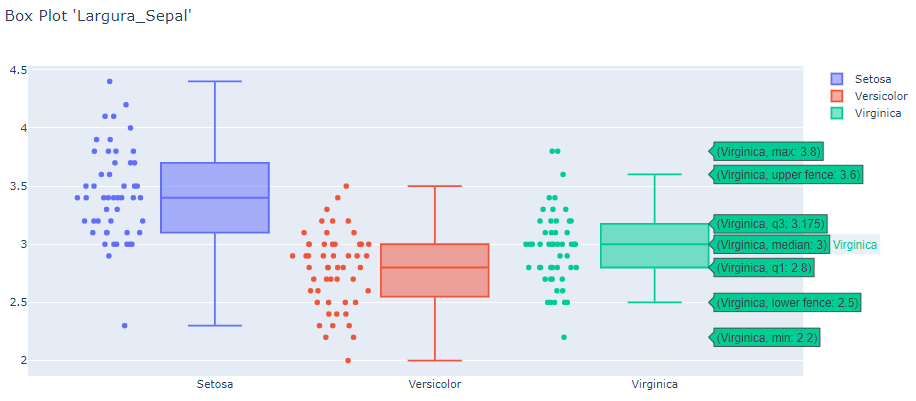

####Bibliotecas utilizadas



In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import plotly.offline as py
import plotly.graph_objs as go

####Análise do DataFrame

In [ ]:
# Ler DF

df = pd.read_csv('iris_modificado.csv', sep=';')

In [ ]:
# Verificar DF

df.head()

In [ ]:
# Definir colunas no DF

df.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

In [ ]:
# Verifica a dimensão do DF 

df.shape

In [ ]:
# Verifica o tipo de dado em cada coluna

df.dtypes

In [ ]:
# Verifica as Classes do DF

df['Classe'].unique()

#### Transformação dos dados

In [ ]:
# Transforma as Classes em valores numéricos

label_encoder = preprocessing.LabelEncoder()
  
df['Classe'] = label_encoder.fit_transform(df['Classe'])

df['Classe'].unique()

In [ ]:
# Transforma os dados para o tipo Float

columns = ['Comprimento_Sepal', 'Largura_Sepal',
           'Comprimento_Petal', 'Largura_Petal']

df[columns] = df[columns].apply(lambda x: x.str.replace(',', '.').astype('float'))

In [ ]:
# Verifica se existem dados vazios no DF

verifica_valores_vazios = df.isnull().values.any()

verifica_valores_vazios

In [ ]:
# Excluir as linhas com dados 'nan'

df_sem_valores_nan = df.dropna()

In [ ]:
# Dados Estatísticos

df.describe()

#### Análise exploratória

In [ ]:
# Separando o DF para analizar cada uma das classes

df_mask = df_sem_valores_nan['Classe'] == 0
df_Iris_setosa = df_sem_valores_nan[df_mask]

df_mask = df_sem_valores_nan['Classe'] == 1
df_Iris_versicolor = df_sem_valores_nan[df_mask]

df_mask = df_sem_valores_nan['Classe'] == 2
df_Iris_virginica = df_sem_valores_nan[df_mask]

In [ ]:
# Análise exploratoria via gráfico e dados estatísticos

# Comprimento Sepal

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Comprimento_Sepal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor['Comprimento_Sepal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica['Comprimento_Sepal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Box Plot 'Comprimento_Sepal'")
fig.show()

# Largura Sepal

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Largura_Sepal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor['Largura_Sepal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica['Largura_Sepal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Box Plot 'Largura_Sepal'")
fig.show()

# Comprimento Petal

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Comprimento_Petal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor['Comprimento_Petal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica['Comprimento_Petal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Box Plot 'Comprimento_Petal'")
fig.show()

# Largura Petal

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Largura_Petal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor['Largura_Petal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica['Largura_Petal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Box Plot 'Largura_Petal'")
fig.show()

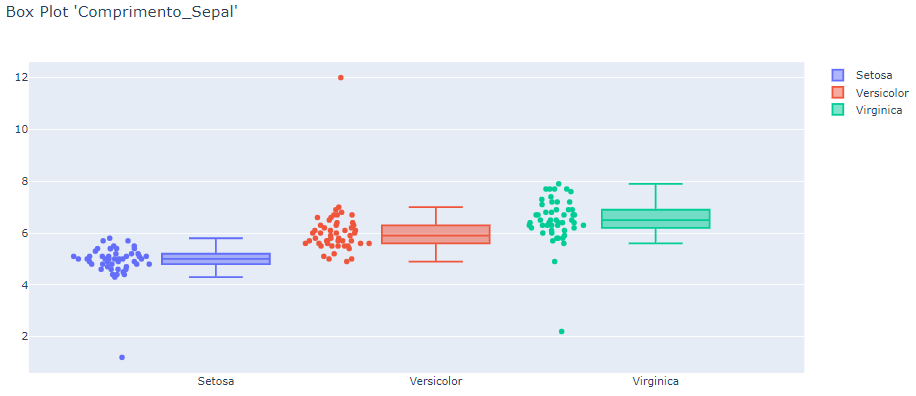

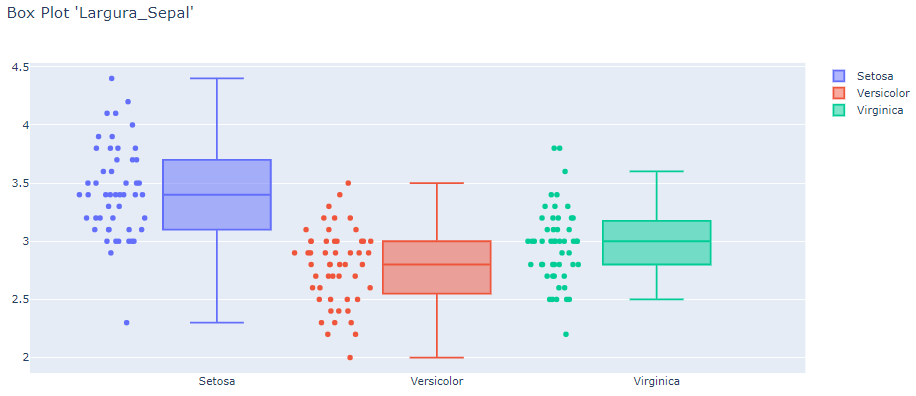

####Função para excluir outliers

In [ ]:
# FUNÇÂO PARA EXCLUIR OUTLIERS USANDO A TÉCNICA DE QUARTIL 

def filtro_quartil_amplitude(df):
    
    print("Mínimo ANTES do filtro: ", min(df['coluna_avaliada']))
    print("Máximo ANTES do filtro: ", max(df['coluna_avaliada']))
    print("Total de dados ANTES do filtro: ", (df['coluna_avaliada']).count())
    
    print("")
    
    Q1 = df['coluna_avaliada'].quantile(0.25)
    Q2 = df['coluna_avaliada'].quantile(0.5)
    Q3 = df['coluna_avaliada'].quantile(0.75)
    
    Amp_interquartil = Q3 - Q1
    
    limite_inferior = (Q1 - (1.2 * Amp_interquartil))
    
    limite_superior = (Q3 + (1.2 * Amp_interquartil))
    
    df_mask = df['coluna_avaliada'] > limite_inferior
    amplitudePos = df[df_mask]
    
    df_mask = amplitudePos['coluna_avaliada'] < limite_superior
    df_final = amplitudePos[df_mask]
    
    print("Mínimo DEPOIS do filtro: ", min(df_final['coluna_avaliada']))
    print("Máximo DEPOIS do filtro: ", max(df_final['coluna_avaliada']))
    print("Total de dados DEPOIS do filtro: ", (df_final['coluna_avaliada']).count())
    
    return df_final

###Excluindo outliers

### IRIS SETOSA

####Comprimento_Sepal 

In [ ]:
df_Iris_setosa_pre_filtro = df_Iris_setosa

df_Iris_setosa_pre_filtro.columns = ['coluna_avaliada', 'Largura_Sepal',
                                     'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado = filtro_quartil_amplitude(df_Iris_setosa_pre_filtro)

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                     'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                   'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Comprimento_Sepal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_setosa_filtrado['Comprimento_Sepal'], name="Setosa sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Setosa - 'Comprimento_Sepal'")
fig.show()

#### Comprimento_Petal

In [ ]:
df_Iris_setosa_pre_filtro = df_Iris_setosa_filtrado

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                     'coluna_avaliada', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado = filtro_quartil_amplitude(df_Iris_setosa_pre_filtro)

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                     'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                   'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Comprimento_Petal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_setosa_filtrado['Comprimento_Petal'], name="Setosa sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Setosa - 'Comprimento_Petal'")
fig.show()

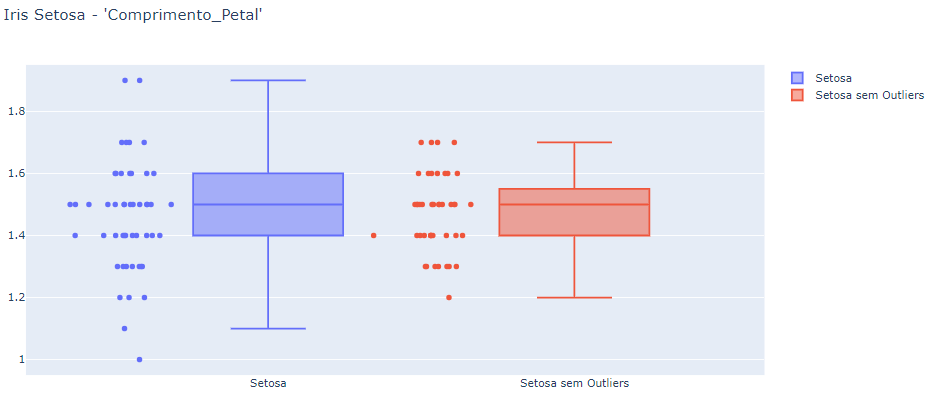

#### Largura_Sepal

In [ ]:
df_Iris_setosa_pre_filtro = df_Iris_setosa_filtrado

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'coluna_avaliada',
                                     'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado = filtro_quartil_amplitude(df_Iris_setosa_pre_filtro)

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                     'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                   'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Largura_Sepal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_setosa_filtrado['Largura_Sepal'], name="Setosa sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Setosa - 'Largura_Sepal'")
fig.show()


####Largura_Petal

In [ ]:
df_Iris_setosa_pre_filtro = df_Iris_setosa_filtrado

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                     'Comprimento_Petal', 'coluna_avaliada', 'Classe']

df_Iris_setosa_filtrado = filtro_quartil_amplitude(df_Iris_setosa_pre_filtro)

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                     'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                   'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Largura_Petal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_setosa_filtrado['Largura_Petal'], name="Setosa sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Setosa - 'Largura_Petal'")
fig.show()

###IRIS VERSICOLOR

####Comprimento_Sepal

In [ ]:
df_Iris_versicolor_pre_filtro = df_Iris_versicolor

df_Iris_versicolor_pre_filtro.columns = ['coluna_avaliada', 'Largura_Sepal',
                                         'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado = filtro_quartil_amplitude(df_Iris_versicolor_pre_filtro)

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                         'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                       'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_versicolor['Comprimento_Sepal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor_filtrado['Comprimento_Sepal'], name="Versicolor sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Versicolor - 'Comprimento_Sepal'")
fig.show()

####Comprimento_Petal

In [ ]:
df_Iris_versicolor_pre_filtro = df_Iris_versicolor_filtrado

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                         'coluna_avaliada', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado = filtro_quartil_amplitude(df_Iris_versicolor_pre_filtro)

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                         'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                       'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_versicolor['Comprimento_Petal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor_filtrado['Comprimento_Petal'], name="Versicolor sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Versicolor - 'Comprimento_Petal'")
fig.show()                                      

####Largura_Sepal

In [ ]:
df_Iris_versicolor_pre_filtro = df_Iris_versicolor_filtrado

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'coluna_avaliada',
                                         'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado = filtro_quartil_amplitude(df_Iris_versicolor_pre_filtro)

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                         'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                       'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_versicolor['Largura_Sepal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor_filtrado['Largura_Sepal'], name="Versicolor sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Versicolor - 'Largura_Sepal'")
fig.show()

####Largura_Petal

In [ ]:
# Iris_versicolor - Largura_Petal 

df_Iris_versicolor_pre_filtro = df_Iris_versicolor_filtrado

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                         'Comprimento_Petal', 'coluna_avaliada', 'Classe']

df_Iris_versicolor_filtrado = filtro_quartil_amplitude(df_Iris_versicolor_pre_filtro)

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                         'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                       'Comprimento_Petal', 'Largura_Petal', 'Classe']


fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_versicolor['Largura_Petal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor_filtrado['Largura_Petal'], name="Versicolor sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Versicolor - 'Largura_Petal'")
fig.show()

###IRIS VIRGINICA

####Comprimento_Sepal

In [ ]:
df_Iris_virginica_pre_filtro = df_Iris_virginica

df_Iris_virginica_pre_filtro.columns = ['coluna_avaliada', 'Largura_Sepal',
                                        'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado = filtro_quartil_amplitude(df_Iris_virginica_pre_filtro)

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                        'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                      'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_virginica['Comprimento_Sepal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica_filtrado['Comprimento_Sepal'], name="Virginica sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Virginica - 'Comprimento_Sepal'")
fig.show()

####Comprimento_Petal

In [ ]:
df_Iris_virginica_pre_filtro = df_Iris_virginica_filtrado

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                        'coluna_avaliada', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado = filtro_quartil_amplitude(df_Iris_virginica_pre_filtro)

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                        'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                      'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_virginica['Comprimento_Petal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica_filtrado['Comprimento_Petal'], name="Virginica sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Virginica - 'Comprimento_Petal'")
fig.show()

####Largura_Sepal

In [ ]:
df_Iris_virginica_pre_filtro = df_Iris_virginica_filtrado

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'coluna_avaliada',
                                        'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado = filtro_quartil_amplitude(df_Iris_virginica_pre_filtro)

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                        'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                      'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_virginica['Largura_Sepal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica_filtrado['Largura_Sepal'], name="Virginica sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Virginica - 'Largura_Sepal'")
fig.show()

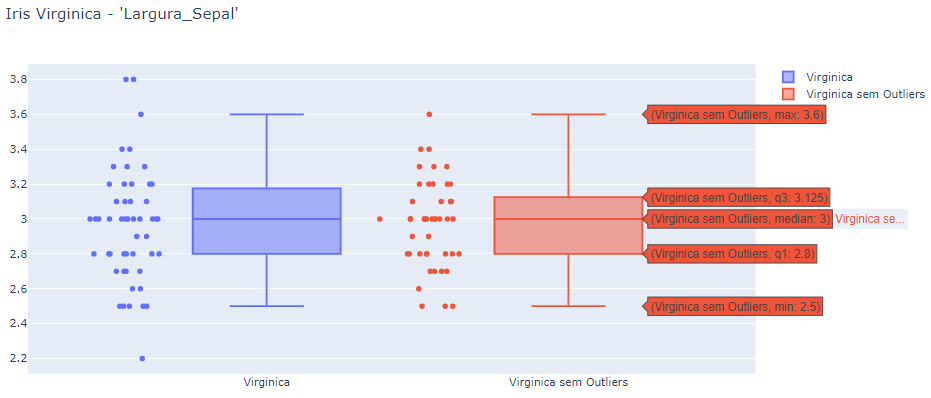

####Largura_Petal

In [ ]:
df_Iris_virginica_pre_filtro = df_Iris_virginica_filtrado

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                        'Comprimento_Petal', 'coluna_avaliada', 'Classe']

df_Iris_virginica_filtrado = filtro_quartil_amplitude(df_Iris_virginica_pre_filtro)

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                        'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                      'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_virginica['Largura_Petal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica_filtrado['Largura_Petal'], name="Virginica sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Virginica - 'Largura_Petal'")
fig.show()

###Concatenar as Classes

In [ ]:
# JUNTADO AS CLASSES NOVAMENTE EM UM MESMO DATAFRAME

df_final_filtrado = pd.concat([df_Iris_setosa_filtrado,
                               df_Iris_versicolor_filtrado], ignore_index = True)

df_final_filtrado = pd.concat([df_final_filtrado, df_Iris_virginica_filtrado],
                              ignore_index = True)


In [ ]:
df_final_filtrado.describe()


### Smote para balancear os Dados

In [ ]:
#APLICANDO SMOTE PARA BALANCEAR OS DADOS CONFORME AS CLASSES 

df_final_filtrado_SEM_classe = df_final_filtrado.iloc[:,:4]
df_final_filtrado_SOMENTE_classe = df_final_filtrado.iloc[:,4:5]

####Divisão em Treino e Teste

In [ ]:
# Aqui foi utilizado 30% para teste e 70% para treinamento

from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()  
scaler.fit(df_final_filtrado_SEM_classe)
df_final_filtrado_SEM_classe_NORMALIZADO = scaler.transform(df_final_filtrado_SEM_classe)

X_train, X_test, y_train, y_test = train_test_split(df_final_filtrado_SEM_classe_NORMALIZADO,
                                                    df_final_filtrado_SOMENTE_classe, 
                                                    test_size = 0.4, random_state = 10)

####Verificar quantas classes tem o dataset atual

In [ ]:
quantidade_classes = y_train['Classe'].value_counts()

print(quantidade_classes)

####Aplicando SMOTE

In [ ]:
oversample = SMOTE()

X_train_Smote, y_train_Smote = oversample.fit_resample(X_train, y_train)

#### Verificar quantas classes tem o novo dataset

In [ ]:
quantidade_classes = y_train_Smote['Classe'].value_counts()

print(quantidade_classes)

### CRIANDO E TREINANDO O MODELO 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report

knn_model = KNeighborsRegressor(n_neighbors=3)

knn_model.fit(X_train_Smote, y_train_Smote)

y_pred  = knn_model.predict(X_test)

#### Avaliando o modelo

In [ ]:
y_pred = pd.DataFrame(y_pred)

y_pred = y_pred.astype(int)

print(classification_report(y_pred, y_test))

from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_pred, y_test)

fig = plt.figure(figsize=(8,4))
fig.suptitle('Matriz de Confusão ', fontsize=14, fontweight='bold')
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.heatmap(matriz,annot=True, fmt="d",cmap='Blues',xticklabels=labels, yticklabels= labels)

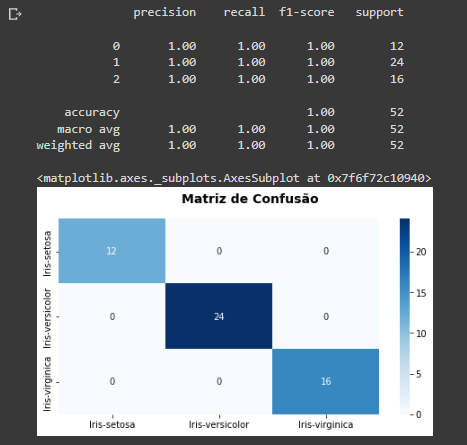